### Gradient Boosting Machines (GBM)
##### AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uygulanabilen genelleştirilmiş versiyonudur.
###### AdaBoost: Zayıf sınıflandırıcıların bir araya gelerek, güçlü sınıflandırıcı oluşturulması.
##### Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
##### Random Forest ve Bagging aksine, ağaçlar arasında bağımlılık bulunur.
###### Oluşturulan ağaçların ürettiği sonuçların üzerinden yeni ağaçlar oluşturulur.

##### Gradient Boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
##### Seri içerisindeki bir model, serideki bir önceki tahmin artıklarının(residuals) üzerine kurularak(fit) oluşturulur.
##### GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent algoritmasını kullanmaktadır.
##### GBM, bir çok temel öğrenici tipiyle(base learner type) kullanılabilir.(Trees, linear terms, splines,..)
##### Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.
##### Boosting + Gradient Descent

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Model & Prediction

In [5]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

###### loss: Gerçek değerler ile tahmin edilen değerler arasındaki farkı optimize eder.
###### learning rate: Her bir ağacın etkisini ifade eder. (n_estimators arasında bir ilişki bulunur.)
###### criterion: Bölünmelere karar vermek adına kullanılan kriter.
###### min_samples_split: Bölünme için gerekli olan minimum bölünme sayısı.

In [6]:
y_pred = gbm_model.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.7445887445887446

#### Model Tuning

In [8]:
gbm = GradientBoostingClassifier()

In [9]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
              "n_estimators": [100, 300, 500, 1000],
              "max_depth": [2, 3, 5, 8]}

In [10]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [11]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [12]:
# Final Model
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500).fit(X_train, y_train)

In [13]:
y_pred = gbm_tuned.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.7359307359307359

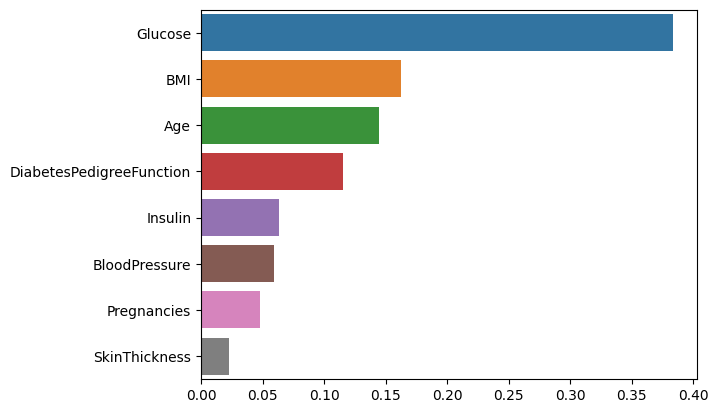

In [15]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()